In [52]:
# Read in the JSON
import json

resolution = 10

data = None
x = []
y = []
with open("dReachTempFile_4_0.smt2.json", "r") as smt2_json:
    data = json.loads("".join(smt2_json.readlines()))
    
    # Itterate through each step
    for trace in data["traces"]:
        # The last trace is always None
        if trace is None:
            break
            
        # Itterate through each variable in the step
        for var_in_mode in trace:
            # The _last varaibles aren't important to plot
            if "last" in var_in_mode["key"]:
                continue
            
            values = []
            first = round(var_in_mode["values"][0]["enclosure"][0])
            last = round(var_in_mode["values"][-1]["enclosure"][-1])
            
            diff = last - first
            if diff == 0:
                values = [first for _ in range(10)]
            else:
                inc = 0
                while len(values) < 10:
                    values.append(round(first + inc, 1))
                    inc += diff / 10
                    
            if "x" in var_in_mode["key"]:
                print("Adding {} to X".format(len(values)))
                x.extend(values)
            else:
                print("Adding {} to Y".format(len(values)))
                y.extend(values)
                

Adding 10 to X
Adding 10 to Y
Adding 10 to X
Adding 10 to Y
Adding 10 to X
Adding 10 to Y
Adding 10 to Y
Adding 10 to X


In [53]:
len(x) == len(y)

True

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

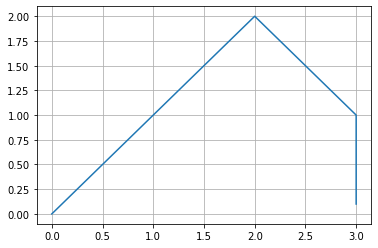

In [60]:
plt.plot(x, y)
plt.grid(True, "both")
plt.show()